# Data

In [9]:
import numpy as np
import tensorflow as tf

# generating data
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], # x, y
    cov=[[1, 0.5],[0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], # x, y
    cov=[[1, 0.5],[0.5,1]],
    size=num_samples_per_class
)

print(f"shapes\npos: {positive_samples.shape}\nneg: {negative_samples.shape}")

shapes
pos: (1000, 2)
neg: (1000, 2)


In [10]:
# concat classes
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [13]:
# generate targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

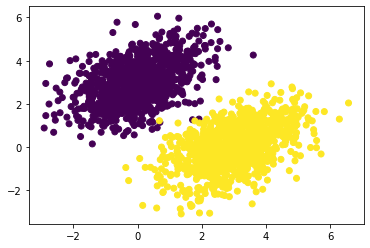

In [15]:
# plotting data
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show()

# Classifier

In [30]:
class Linear_Classifier:
    def __init__(self, input_dim, output_dim, learning_rate):
        self.input_dim = input_dim, 
        self.output_dim = output_dim,
        self.W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))), 
        self.b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
        self.learning_rate = learning_rate

    def predict(self, inputs):
        # pred = W * input + b
        return tf.matmul(inputs, self.W) * self.b

    def square_loss(self, targets, predictions):
            per_sample_losses = tf.square(targets - predictions)
            return tf.reduce_mean(per_sample_losses)

    def train(self, inputs, targets):
        with tf.GradientTape() as tape:
            # forward pass
            predictions = self.predict(inputs)
            loss = self.square_loss(targets, predictions)
        # get gradients
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [self.W, self.b])
        # update weights
        self.W.assign_sub(grad_loss_wrt_W * self.learning_rate)
        self.b.assign_sub(grad_loss_wrt_b * self.learning_rate)
        return loss

In [31]:
input_dim = 2
output_dim = 1
learning_rate = 0.1
clf = Linear_Classifier(
    input_dim=input_dim,
    output_dim=output_dim,
    learning_rate=0.1
)

In [33]:
print(clf.W)

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.24935973],
       [0.0094533 ]], dtype=float32)>,)


In [32]:
for step in range(40):
    loss = clf.train(inputs, targets)
    print(f"Loss at {step}: {loss:.4f}")

AttributeError: ignored